# Smart San Antonio

## Air Quality Data

In [1]:
# General Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Geospatial Library
import folium
import src

plt.style.use('tableau-colorblind10')

## Acquire

In [2]:
df = src.get_zone_data(sensor='air_quality', zone='all')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273340 entries, 0 to 273339
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DateTime        273340 non-null  object 
 1   Sensor_id       273340 non-null  object 
 2   Vendor          273340 non-null  object 
 3   SensorModel     273340 non-null  object 
 4   LAT             273340 non-null  float64
 5   LONG            273340 non-null  float64
 6   Zone            273340 non-null  object 
 7   Pm1_0           273340 non-null  int64  
 8   Pm2_5           273340 non-null  int64  
 9   Pm10            273340 non-null  int64  
 10  SO2             273340 non-null  int64  
 11  O3              273340 non-null  float64
 12  CO              273340 non-null  int64  
 13  NO2             273340 non-null  int64  
 14  AlertTriggered  231004 non-null  object 
 15  SensorStatus    273340 non-null  object 
dtypes: float64(3), int64(6), object(7)
memory usage: 33.4+ M

In [4]:
df.head(3)

,DateTime,Sensor_id,Vendor,SensorModel,LAT,LONG,Zone,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,AlertTriggered,SensorStatus
0,2021-05-20T00:01:27,689324d0f345350d,ATT,AQM-01-00-01-00-01-00-GY,29.34473,-98.435672,Brooks,6,6,7,0,0.0,0,0,None,Normal
1,2021-05-20T00:04:27,689324d0f345350d,ATT,AQM-01-00-01-00-01-00-GY,29.34473,-98.435672,Brooks,6,6,7,0,0.0,0,0,None,Normal
2,2021-05-20T00:07:28,689324d0f345350d,ATT,AQM-01-00-01-00-01-00-GY,29.34473,-98.435672,Brooks,6,6,7,0,0.0,0,0,None,Normal


In [5]:
df.tail(3)

,DateTime,Sensor_id,Vendor,SensorModel,LAT,LONG,Zone,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,AlertTriggered,SensorStatus
273337,2021-06-18T23:45:00,70463,ITRON,ClimaCell,29.50484,-98.5835,Medical Center,-999,0,-999,-999,62.3,-999,11,NaN,Normal
273338,2021-06-18T23:50:00,70463,ITRON,ClimaCell,29.50484,-98.5835,Medical Center,-999,0,-999,-999,62.3,-999,11,NaN,Normal
273339,2021-06-18T23:55:00,70463,ITRON,ClimaCell,29.50484,-98.5835,Medical Center,-999,0,-999,-999,62.3,-999,11,NaN,Normal


In [6]:
df.isna().sum()

DateTime              0
Sensor_id             0
Vendor                0
SensorModel           0
LAT                   0
LONG                  0
Zone                  0
Pm1_0                 0
Pm2_5                 0
Pm10                  0
SO2                   0
O3                    0
CO                    0
NO2                   0
AlertTriggered    42336
SensorStatus          0
dtype: int64

In [7]:
df.nunique()

DateTime          79430
Sensor_id            12
Vendor                2
SensorModel           2
LAT                  18
LONG                 19
Zone                  3
Pm1_0                93
Pm2_5               108
Pm10                115
SO2                   8
O3                 1722
CO                   17
NO2                  34
AlertTriggered        7
SensorStatus          1
dtype: int64

In [8]:
df.describe()

,LAT,LONG,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2
count,273340.000000,273340.000000,273340.000000,273340.000000,273340.000000,273340.000000,273340.000000,273340.000000,273340.000000
mean,29.407007,-98.487286,-140.900626,12.850809,-139.276330,-154.707953,5.796103,-154.547260,1.262325
std,0.067307,0.059925,681.609688,192.743115,570.728527,361.442071,15.297399,361.513106,3.136031
min,29.344120,-98.583500,-999.000000,0.000000,-999.000000,-999.000000,0.000000,-999.000000,0.000000
25%,29.344730,-98.580288,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,29.414910,-98.481432,6.000000,7.000000,8.000000,0.000000,0.000000,0.000000,0.000000
75%,29.504840,-98.435672,11.000000,12.000000,15.000000,0.000000,0.000000,0.000000,1.000000
max,29.510070,-98.434544,65288.000000,65288.000000,65310.000000,26.000000,120.000000,129.000000,41.000000


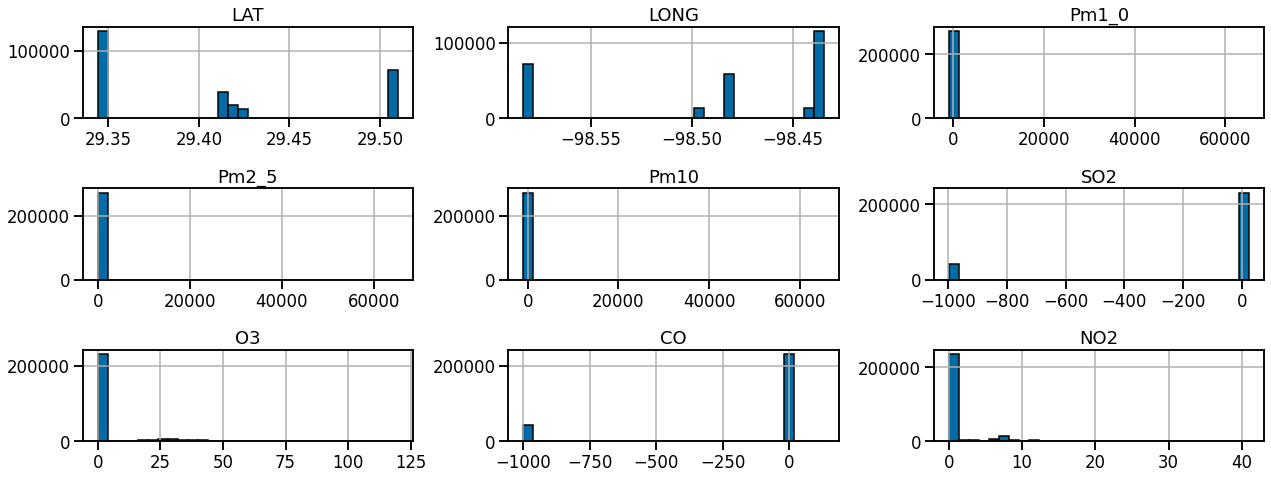

In [9]:
sns.set_context('talk')
plt.style.use('tableau-colorblind10')

df.hist(figsize=(18, 7), bins=30, ec='black')
plt.tight_layout();

## Prepare

- Format column names: Lowercase each name.
- Replace column names with descriptive names.
- Cast the date strings as datetime.
- Replace missing values in the `alert_triggered` column with "Not Supported".
    - Refer to the data dictionary.

In [10]:
df = src.prep_data(data=df, filename='air')

## Explore

In [11]:
df.head(2)

,date,sensor_id,vendor,sensor_model,latitude,longitude,zone,micron_1,micron_2,micron_10,sulfur,ozone,carbon,nitrogen,alert_triggered,sensor_status
0,2021-05-20 00:01:27,689324d0f345350d,ATT,AQM-01-00-01-00-01-00-GY,29.34473,-98.435672,Brooks,6,6,7,0,0.0,0,0,None,Normal
1,2021-05-20 00:04:27,689324d0f345350d,ATT,AQM-01-00-01-00-01-00-GY,29.34473,-98.435672,Brooks,6,6,7,0,0.0,0,0,None,Normal


## How many Air Quality sensors are there in each zone?

In [12]:
df.groupby('zone').sensor_id.nunique()

zone
Brooks            4
Downtown          4
Medical Center    4
Name: sensor_id, dtype: int64

## Where are the Air Quality Sensors located?

In [13]:
geo_cols = ['zone', 'sensor_id', 'latitude', 'longitude']
df_sensors = df.groupby(geo_cols).size().reset_index().rename(columns={0:'count'})

df_sensors

,zone,sensor_id,latitude,longitude,count
0,Brooks,63d684c940ce1f6b,29.34566,-98.434544,38356
1,Brooks,689324d0f345350d,29.34473,-98.435672,38413
2,Brooks,6de2cc6034fd26e8,29.34412,-98.436440,38363
3,Brooks,70449,29.34602,-98.439550,14112
4,Downtown,63db58629a2d20a7,29.41661,-98.484080,19311
5,Downtown,64d7e0e4cfeba0b6,29.41491,-98.481400,19314
6,Downtown,64d7e4dbde37ccb5,29.41591,-98.482880,19311
7,Downtown,70456,29.42457,-98.494570,14112
8,Medical Center,63e0b0eae3495a39,29.51007,-98.580288,19311
9,Medical Center,6dee283d397b9803,29.50752,-98.581368,19312


In [31]:
m = folium.Map(location=[29.4363, -98.4881],
               zoom_start=10,
               max_bounds=True,
               zoom_control=False)

# Plot the coordinates for each noise sensor.

zone_colors = ['orange', 'red', 'purple']
zones = ['Brooks', 'Downtown', 'Medical Center']

for z, zc in zip(zones, zone_colors):
    data = df_sensors[df_sensors.zone == z]

    for _, row in data.iterrows():
        m.add_child(
            folium.Marker(location=[str(row['latitude']), str(row['longitude'])],
                          tooltip=row['zone'],
                          prefer_canvas=True,
                          disable_3d=True,
                          icon=folium.Icon(icon='leaf',
                                           color=zc)
                         )
                    )

In [32]:
m

## What is the highest water level recorded in each zone? 

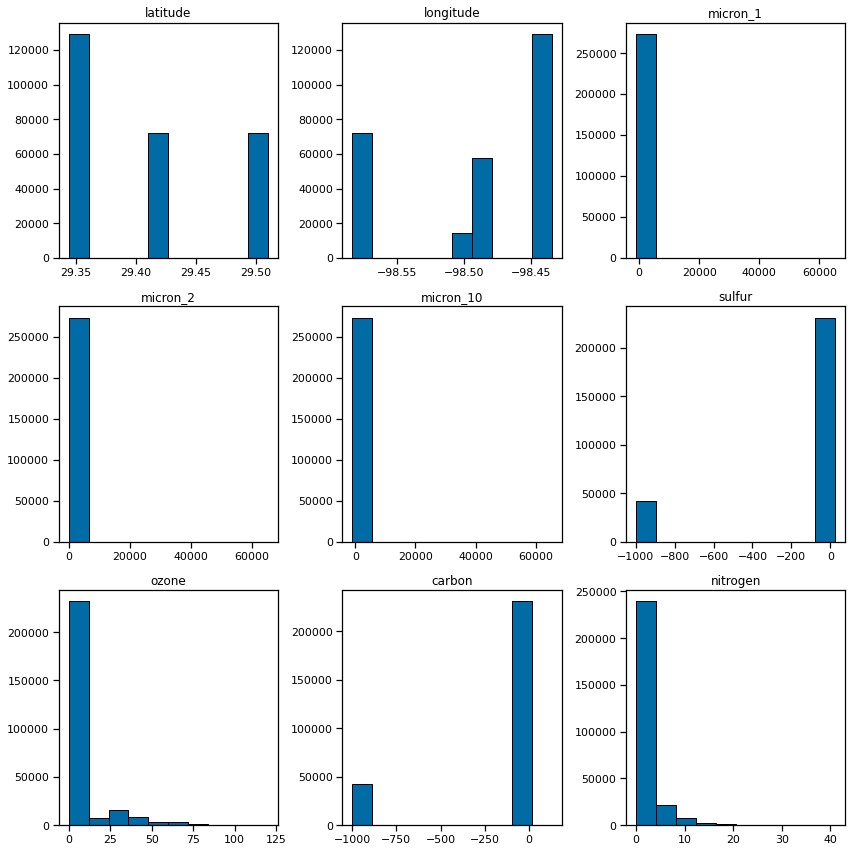

In [16]:
sns.set_context('notebook')

df.hist(figsize=(12, 12),
        grid=False,
        ec='black')
plt.tight_layout();

In [17]:
df_air_stats = df.groupby('zone')[['sulfur', 'ozone']].describe(percentiles=[.25, .75, .997]).reset_index()

df_air_stats

zone    sulfur                                                \
                      count        mean         std    min  25%  50%  75%   
0          Brooks  129244.0 -109.035878  311.580706 -999.0  0.0  0.0  0.0   
1        Downtown   72048.0 -195.672080  396.475102 -999.0  0.0  0.0  0.0   
2  Medical Center   72048.0 -195.673121  396.474578 -999.0  0.0  0.0  0.0   

                  ozone                                                    \
  99.7%   max     count      mean        std  min  25%  50%  75%    99.7%   
0   1.0  13.0  129244.0  4.260684  13.570212  0.0  0.0  0.0  0.0  78.3125   
1   0.0  26.0   72048.0  7.414002  17.167927  0.0  0.0  0.0  0.0  85.0000   
2   0.0   6.0   72048.0  6.932532  15.955981  0.0  0.0  0.0  0.0  79.1875   

           
      max  
0  111.60  
1  120.00  
2  117.53

In [18]:
df.groupby('zone')[['carbon', 'nitrogen']].describe(percentiles=[.25, .75, .997]).reset_index()

zone    carbon                                                \
                      count        mean         std    min  25%  50%  75%   
0          Brooks  129244.0 -108.881318  311.638319 -999.0  0.0  0.0  0.0   
1        Downtown   72048.0 -195.536406  396.542732 -999.0  0.0  0.0  0.0   
2  Medical Center   72048.0 -195.476405  396.573814 -999.0  0.0  0.0  0.0   

                nitrogen                                                      
  99.7%    max     count      mean       std  min  25%  50%  75% 99.7%   max  
0   3.0  129.0  129244.0  0.926929  2.678584  0.0  0.0  0.0  0.0  18.0  38.0  
1   3.0  128.0   72048.0  1.509105  3.602522  0.0  0.0  0.0  0.0  20.0  41.0  
2   4.0  129.0   72048.0  1.617200  3.327812  0.0  0.0  0.0  1.0  18.0  36.0

In [19]:
q3 = np.percentile(df['ozone'], 75)
q1 = np.percentile(df['ozone'], 25)
iqr = (q3 - q1)

upper_bound = (iqr * 3) + q3

outliers = df.loc[df.ozone > upper_bound].sort_values('date').reset_index(drop=True)

In [20]:
outliers

,date,sensor_id,vendor,sensor_model,latitude,longitude,zone,micron_1,micron_2,micron_10,sulfur,ozone,carbon,nitrogen,alert_triggered,sensor_status
0,2021-04-20 00:14:23,6de2cc6034fd26e8,ATT,AQM-01-00-01-00-01-00-GY,29.34412,-98.436440,Brooks,5,7,10,0,0.10,0,0,no2,Normal
1,2021-04-20 02:11:17,6de2cc6034fd26e8,ATT,AQM-01-00-01-00-01-00-GY,29.34412,-98.436440,Brooks,9,9,12,0,0.10,0,1,no2,Normal
2,2021-04-20 04:02:24,6dee283d397b9803,ATT,AQM-01-00-01-00-01-00-GY,29.50752,-98.581368,Medical Center,6,9,11,0,2.50,1,0,o3,Normal
3,2021-04-20 05:15:06,6de2cc6034fd26e8,ATT,AQM-01-00-01-00-01-00-GY,29.34412,-98.436440,Brooks,5,7,10,0,0.10,0,0,no2,Normal
4,2021-04-20 05:16:47,6de2cc6034fd26e8,ATT,AQM-01-00-01-00-01-00-GY,29.34412,-98.436440,Brooks,5,7,10,0,0.10,0,0,no2,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44046,2021-06-18 23:50:00,70463,ITRON,ClimaCell,29.50484,-98.583500,Medical Center,-999,0,-999,-999,62.30,-999,11,NaN,Normal
44047,2021-06-18 23:50:00,70456,ITRON,ClimaCell,29.42457,-98.494570,Downtown,-999,0,-999,-999,72.00,-999,11,NaN,Normal
44048,2021-06-18 23:55:00,70449,ITRON,ClimaCell,29.34602,-98.439550,Brooks,-999,0,-999,-999,73.08,-999,11,NaN,Normal
44049,2021-06-18 23:55:00,70456,ITRON,ClimaCell,29.42457,-98.494570,Downtown,-999,0,-999,-999,72.00,-999,11,NaN,Normal


## What is the water level throughout the day for each zone?

In [21]:
air = df.groupby(['date', 'zone']).ozone.agg(['mean']).sort_values(by=['zone', 'date']).reset_index()

In [22]:
air.set_index(pd.DatetimeIndex(air['date']), inplace=True)

In [23]:
air

,date,zone,mean
date,,,
2021-04-20 00:00:06,2021-04-20 00:00:06,Brooks,0.0
2021-04-20 00:01:47,2021-04-20 00:01:47,Brooks,0.0
2021-04-20 00:03:06,2021-04-20 00:03:06,Brooks,0.0
2021-04-20 00:04:18,2021-04-20 00:04:18,Brooks,0.0
2021-04-20 00:04:21,2021-04-20 00:04:21,Brooks,0.0
...,...,...,...
2021-06-18 23:52:55,2021-06-18 23:52:55,Medical Center,0.0
2021-06-18 23:55:00,2021-06-18 23:55:00,Medical Center,62.3
2021-06-18 23:55:55,2021-06-18 23:55:55,Medical Center,0.0


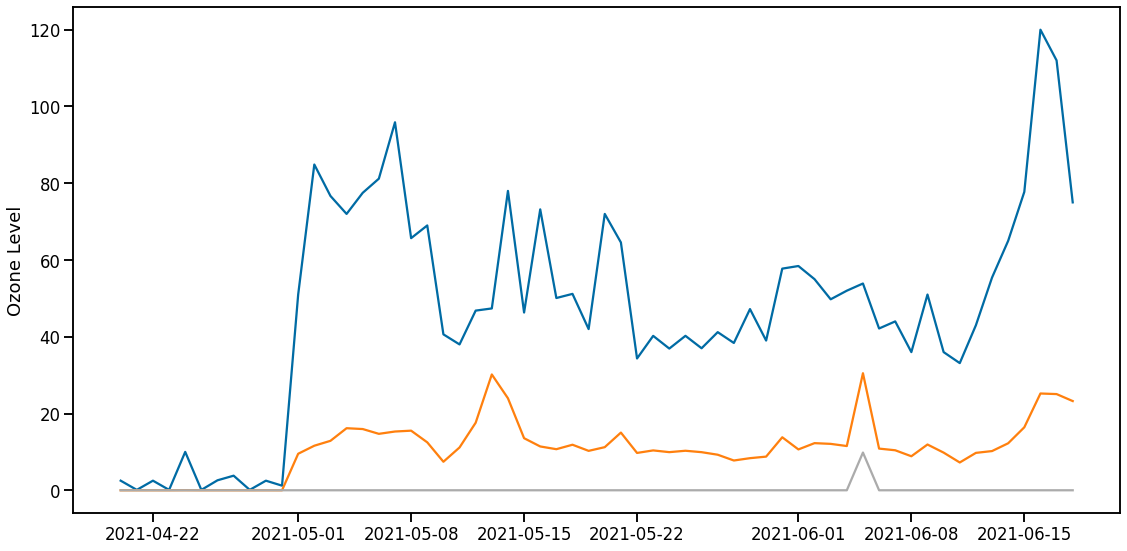

In [24]:
sns.set_context('talk')

plt.figure(figsize=(16, 8))
plt.plot(air.resample('D').agg(['max', 'mean', 'min']))

plt.xlabel('')
plt.ylabel('Ozone Level')
plt.tight_layout();

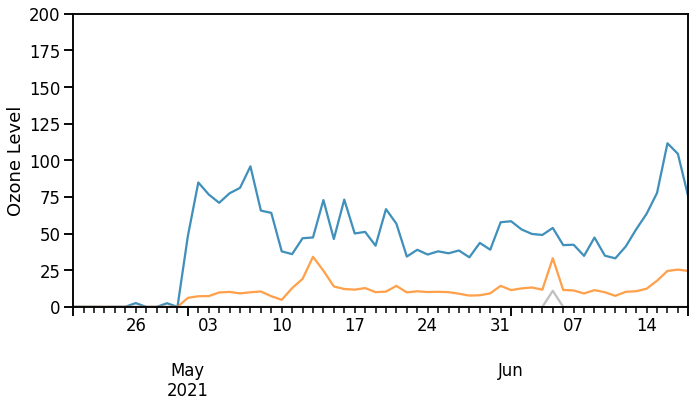

In [25]:
air[air.zone=='Brooks'].resample('D').agg(['max', 'mean', 'min']).plot(figsize=(10, 6), alpha=.75, legend=False)

plt.xlabel('')
plt.ylabel('Ozone Level')

plt.ylim(0, 200)
plt.tight_layout();

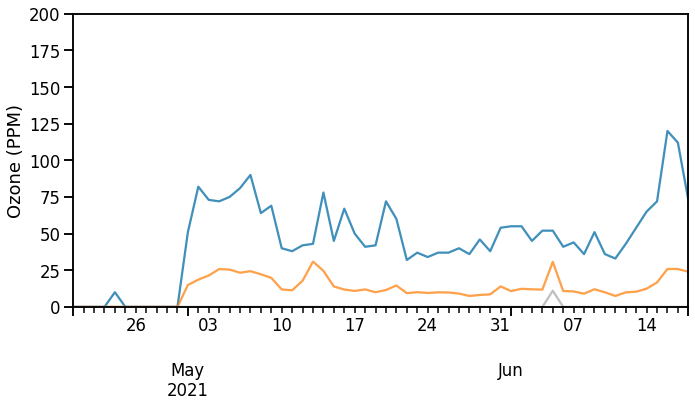

In [26]:
air[air.zone=='Downtown'].resample('D').agg(['max', 'mean', 'min']).plot(figsize=(10, 6), alpha=.75, legend=False)

plt.xlabel('')
plt.ylabel('Ozone (PPM)')

plt.ylim(0, 200)
plt.tight_layout();

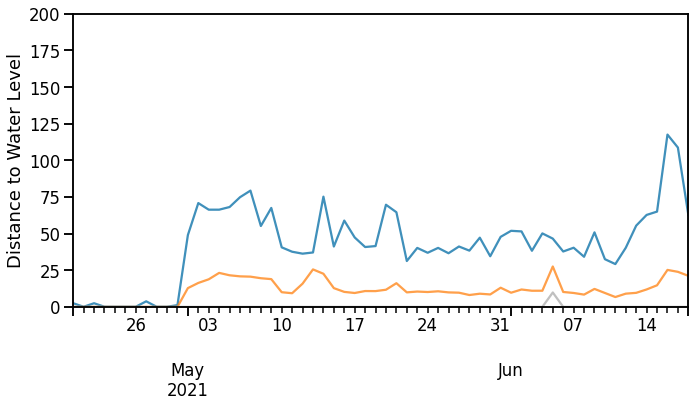

In [27]:
air[air.zone == 'Medical Center'].resample('D').agg(['max', 'mean', 'min']).plot(figsize=(10, 6), alpha=.75, legend=False)

plt.xlabel('')
plt.ylabel('Distance to Water Level')

plt.ylim(0, 200)
plt.tight_layout();

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

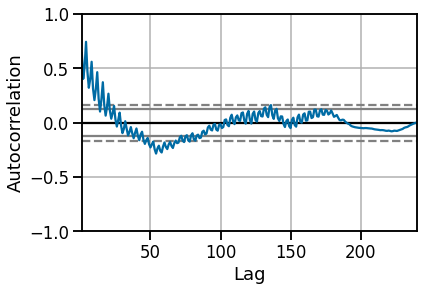

In [28]:
pd.plotting.autocorrelation_plot(air[air.zone=='Downtown'].resample('6H').mean())

In [29]:
top_dates = air.resample('D').mean().sort_values(by=['mean'],ascending=False).head(3)
vals = []
for tgl, tot in zip(top_dates.index, top_dates["mean"]):
    tgl = tgl.strftime("%d %B")
    val = "%d (%s)"%(tot, tgl)
    vals.append(val)
top_dates['tgl'] = vals
top_dates

,mean,tgl
date,,
2021-06-05,30.491944,30 (05 June)
2021-05-13,30.174516,30 (13 May)
2021-06-16,25.213962,25 (16 June)


In [30]:
fig = go.Figure(data=go.Scatter(x=air.resample('D').mean().index.astype(dtype=str), 
                                y=air.resample('D').mean()['mean'],
                                text="counts"))

fig.update_layout({"title": 'Ozone in all Zones',
                   "yaxis": {"title": r"Ozone (PPM)"},
                   "showlegend": False})

fig.add_traces(go.Scatter(x=top_dates.index, y=top_dates['mean'],
                          textposition='top center',
                          textfont=dict(color='#233a77'),
                          mode='markers+text',
                          marker=dict(color='red', size=8),
                          text = top_dates["tgl"]))

fig.update_traces(textfont_size=12)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',
xaxis_range=['2021-04-15','2021-06-01'],
yaxis_range=[0, 250])

fig.show()

### Hypothesis Tests

## Conclusions 